In [ ]:
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

random.seed(42)
np.random.seed(42)

### Preprocessing

In [2]:
def preprocess_yolo_image(img_path, size=640):
    """
    Manual preprocessing for visualization or custom dataloaders
    """
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (size, size))
    img_norm = img_resized / 255.0
    return img_norm

### Augmentation

In [3]:
yolo_model = YOLO("yolov8n.pt")

# yolo_model.train(
#     data="datasets/object_detection_dataset/data.yaml",
#     epochs=10,
#     imgsz=640,
#     batch=16,
#     augment=True   # enables YOLOv8 augmentations
# )

In [5]:
yolo_model.train(
    data="datasets/object_detection_dataset/data.yaml",
    epochs=10,
    imgsz=640,
    batch=16,
    hsv_h=0.015,      # color
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10,       # rotation
    translate=0.1,
    scale=0.4,        # zoom
    shear=2.0,
    flipud=0.1,       # vertical flip
    fliplr=0.5,       # horizontal flip
    mosaic=0.8,       # YOLO special augment
    mixup=0.2,

    project="saved_models",
    name="yolo_model",
    exist_ok=True
)


New https://pypi.org/project/ultralytics/8.3.233 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.232  Python-3.12.8 torch-2.9.1+cpu CPU (Intel Core i7-14700)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/object_detection_dataset/data.yaml, degrees=10, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.1, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=0.8, multi_scale=False, name=yolo_model, nbs=64, nms=False, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002685E844CB0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [15]:
results_csv = "saved_models/yolo_model/results.csv"
df = pd.read_csv(results_csv)
df.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
5,6,3515.72,1.49451,1.44093,1.79842,0.69945,0.54606,0.60065,0.29314,1.75367,1.72272,2.04696,0.000842,0.000842,0.000842
6,7,3957.31,1.43876,1.32073,1.74438,0.78385,0.67896,0.75412,0.41282,1.57809,1.29808,1.81917,0.000677,0.000677,0.000677
7,8,4506.32,1.38133,1.17095,1.68651,0.80290,0.65129,0.72347,0.39018,1.59907,1.39835,1.81272,0.000512,0.000512,0.000512
8,9,5049.14,1.33311,1.09779,1.63666,0.81502,0.72638,0.79400,0.46640,1.48680,1.13431,1.73072,0.000347,0.000347,0.000347
9,10,5618.92,1.26172,1.01315,1.57915,0.84541,0.71957,0.80514,0.46589,1.47891,1.08740,1.70688,0.000182,0.000182,0.000182


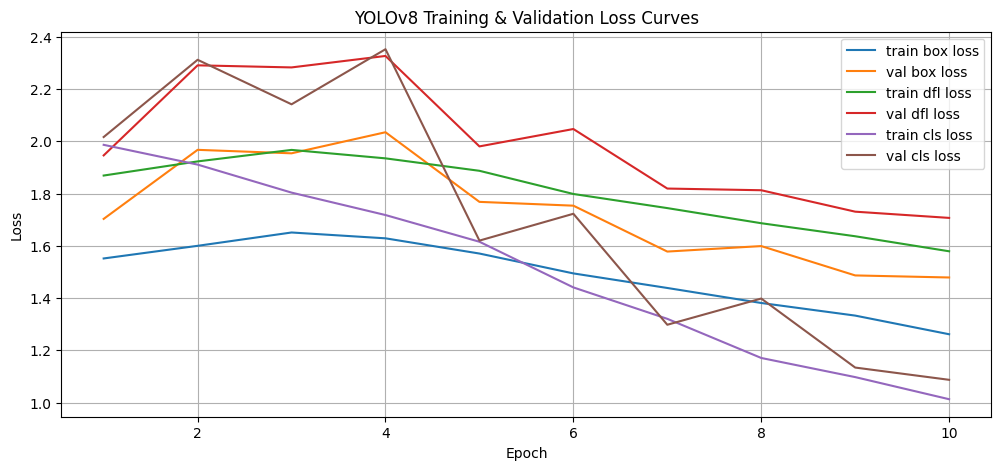

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df["epoch"], df["train/box_loss"], label="train box loss")
plt.plot(df["epoch"], df["val/box_loss"], label="val box loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="train dfl loss")
plt.plot(df["epoch"], df["val/dfl_loss"], label="val dfl loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="train cls loss")
plt.plot(df["epoch"], df["val/cls_loss"], label="val cls loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("YOLOv8 Training & Validation Loss Curves")
plt.legend()
plt.grid(True)
plt.show()

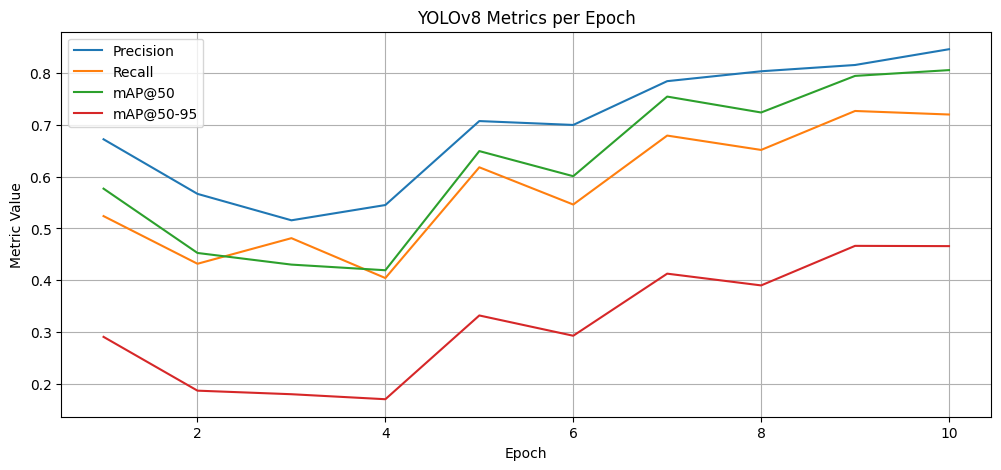

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@50-95")

plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("YOLOv8 Metrics per Epoch")
plt.legend()
plt.grid(True)
plt.show()